# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane, had significantly smaller tumor sizes compared to Infubinol and Ceftamin. The data would suggest that during the study, Capomulin and Ramicane showed more prominent results and received more testing, as there is a larger amount of mice on that drug regimen than the others.

- On average, there was a signficant correlation between the weight of the rats and size of the tumors.

- The study was conducted roughly evenly for both sexes of mice.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined = pd.merge(study_results, mouse_metadata, on="Mouse ID")
# Display the data table for preview
combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
combined['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined[combined.duplicated()]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.0,0,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupli = combined.loc[combined['Mouse ID'] == 'g989']
dupli

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = combined.loc[combined["Mouse ID"] != 'g989']
clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
clean['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_data = clean.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_data = clean.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance_data = clean.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
stddev_data = clean.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
stderr_data = clean.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Summary_data = pd.DataFrame({'Mean Tumor Volume' : mean_data,
                             'Median Tumor Volume' : median_data,
                             'Tumor Volume Variance' : variance_data,
                             'Tumor Volume Std. Dev.' : stddev_data,
                             'Tumor Volume Std. Err.' : stderr_data
                                })
Summary_data


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
Summary_agg = clean.groupby('Drug Regimen').aggregate({'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std', 'sem']})
# Using the aggregation method, produce the same summary statistics in a single line.

Summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

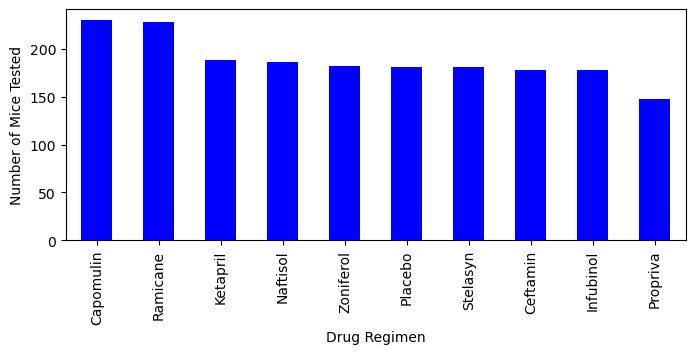

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drugs = clean.groupby(["Drug Regimen"]).count()["Timepoint"]
drugs = drugs.sort_values(ascending=False)
x_axis = np.arange(0, len(drugs), 1)
tick_locations = [_ for _ in x_axis]
data_plot = drugs.plot(kind='bar', facecolor='blue', figsize=(8,3), xlabel = "Drug Regimen", ylabel = "Number of Mice Tested")
data_plot.set_xticklabels(drugs.index, rotation="vertical")

plt.show()

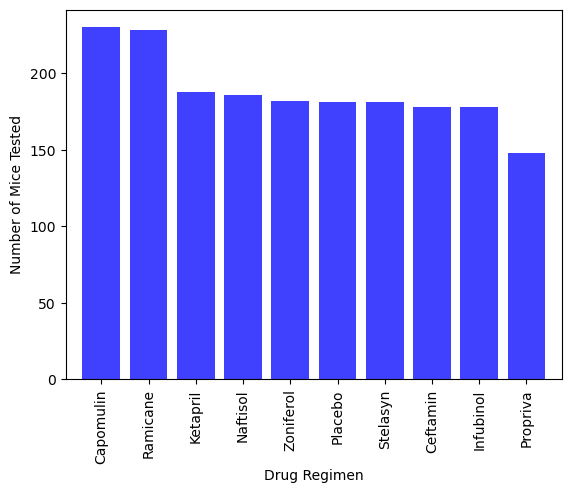

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.


plt.bar(x_axis, drugs, facecolor='blue', alpha=0.75, align='center')
plt.xticks(tick_locations, drugs.index, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xlim(-0.75, len(drugs)-.25)
plt.show()


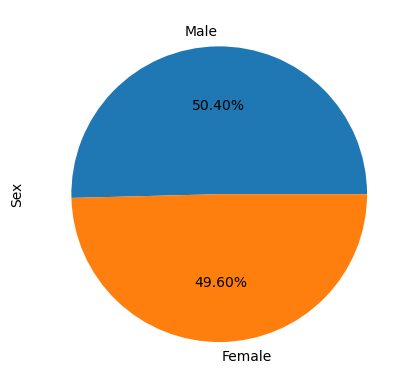

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = clean.groupby(["Sex"]).nunique()["Mouse ID"]
sex = sex.sort_values(ascending=False)
sex = sex.rename("Sex")
sex.plot.pie(y="Sex", autopct='%1.2f%%')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

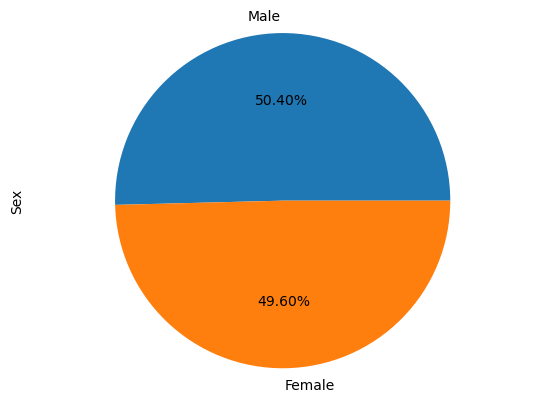

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex, labels=sex.index, autopct='%1.2f%%')
plt.axis('equal')
plt.ylabel("Sex")
plt.show

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
big_mice = clean.groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

refined = pd.merge(big_mice, clean, how='inner', on='Mouse ID')
refined = refined.loc[refined['Timepoint_x'] == refined['Timepoint_y']]
refined = refined.drop(columns=['Timepoint_x'])
refined = refined.rename(columns={'Timepoint_y': 'Timepoint'})
refined = refined.loc[(refined['Drug Regimen'] == 'Capomulin') | (refined['Drug Regimen'] == 'Ramicane') | (refined['Drug Regimen'] == 'Infubinol') | (refined['Drug Regimen'] == 'Ceftamin') ]
refined = refined.reset_index()
refined

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,9,a203,45,67.973419,2,Infubinol,Female,20,23
1,19,a251,45,65.525743,1,Infubinol,Female,21,25
2,39,a275,45,62.999356,3,Ceftamin,Female,20,28
3,66,a411,45,38.407618,1,Ramicane,Male,3,22
4,76,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...,...
95,1812,y769,45,68.594745,4,Ceftamin,Female,6,27
96,1822,y793,45,31.896238,2,Capomulin,Male,17,17
97,1832,y865,45,64.729837,3,Ceftamin,Male,23,26
98,1849,z578,45,30.638696,0,Ramicane,Male,11,16


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin" ]
# Create empty list to fill with tumor vol data (for plotting)

tumors = []
temp = []
# Calculate the IQR and quantitatively determine if there are any potential outliers.
for x in range(0, len(treatments)):
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tempframe = refined.loc[(refined["Drug Regimen"] == treatments[x])]
    temp = tempframe["Tumor Volume (mm3)"].values.tolist()
     # add subset 
    tumors.append(temp) 
    # Determine outliers using upper and lower bounds
    quantiles = tempframe["Tumor Volume (mm3)"].quantile([0.25, 0.75])
    iqr = quantiles[0.75] - quantiles[0.25]
    lower = quantiles[0.25] - iqr
    upper = quantiles[0.75] + iqr
    outlier_occ = tempframe.loc[(tempframe["Tumor Volume (mm3)"] < lower) | (tempframe["Tumor Volume (mm3)"] > upper), :]
    print(treatments[x], " max outlier: ", outlier_occ["Tumor Volume (mm3)"].max())
    print(treatments[x], " min outlier: ", outlier_occ["Tumor Volume (mm3)"].min())
    temp = []
print("It would appear they only contain outliers on the lower end, none are above the 3rd quartile, while Ceftamin has 0 outliers.")

Capomulin  max outlier:  23.34359787
Capomulin  min outlier:  23.34359787
Ramicane  max outlier:  22.05012627
Ramicane  min outlier:  22.05012627
Infubinol  max outlier:  36.3213458
Infubinol  min outlier:  36.3213458
Ceftamin  max outlier:  nan
Ceftamin  min outlier:  nan
It would appear they only contain outliers on the lower end, none are above the 3rd quartile, while Ceftamin has 0 outliers.


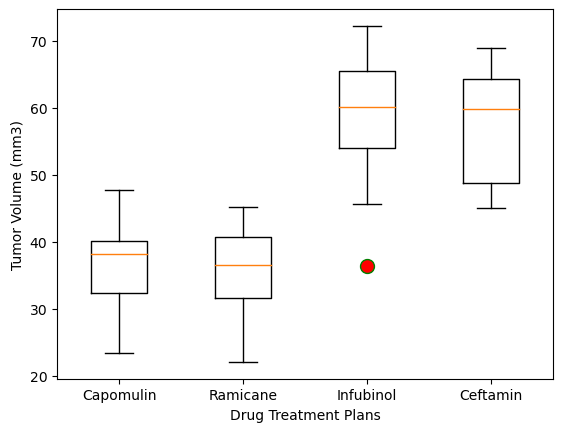

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='r', markersize=10,
                  linestyle='none', markeredgecolor='g')
plt.boxplot(tumors, flierprops=flierprops)
plt.xticks([1, 2, 3, 4], treatments)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug Treatment Plans")
plt.show()


## Line and Scatter Plots

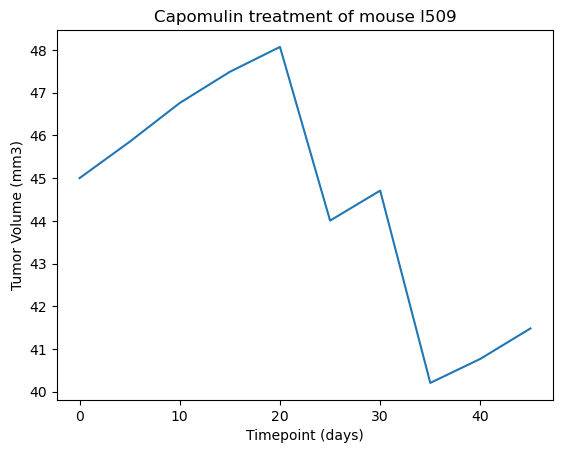

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
single = clean.loc[clean['Mouse ID'] == 'l509']
plt.plot(single["Timepoint"], single["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

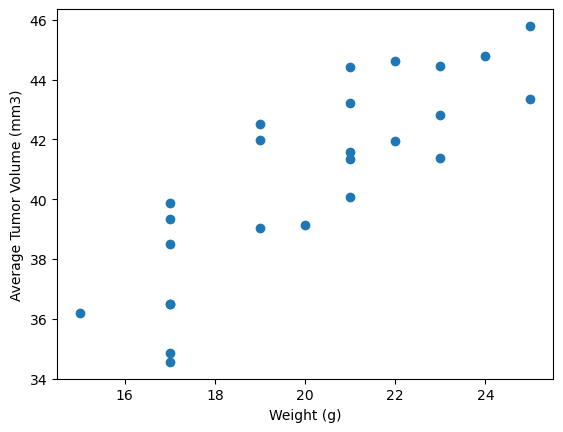

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
big_temp = clean.loc[clean['Drug Regimen'] == 'Capomulin']
big_ave = big_temp.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]
big = pd.merge(big_temp, big_ave, on="Mouse ID")
big = big.drop(columns=['Tumor Volume (mm3)_x'])
big = big.rename(columns={'Tumor Volume (mm3)_y' : 'Tumor Volume Average (mm3)'})
big = big.drop_duplicates(subset=["Mouse ID"])
plt.scatter(big["Weight (g)"], big['Tumor Volume Average (mm3)'] )
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is  0.84


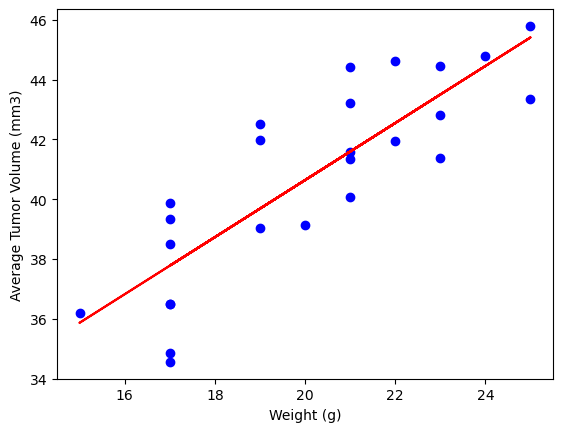

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
r = st.pearsonr(big["Weight (g)"], big['Tumor Volume Average (mm3)'])[0]
r= round(r, 2)
print("The correlation between mouse weight and the average tumor volume is ", r)
(slope, intercept, rvalue, pvalue, stderrr) = st.linregress(big["Weight (g)"], big['Tumor Volume Average (mm3)'])
regress_values = slope * big["Weight (g)"] + intercept
plt.scatter(big["Weight (g)"], big['Tumor Volume Average (mm3)'], color='blue')
plt.plot(big["Weight (g)"], regress_values, color='red')
plt.annotate(f"y = {round(slope, 2)}x {round(intercept, 2)}", (1, 5), color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()